In [66]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

JDs = []
flux = []
flux_err = []

with open("NEW_SECTION_4_3/kepler1.dat") as file:
    lines = file.readlines()
    column0 = []
    column1 = []
    column2 = []
    for x in lines:
        column0.append(float(x.split(' ')[0]))
        column1.append(float(x.split(' ')[1]))
        column2.append(float(x.split(' ')[2]))
    JDs.append(column0)
    flux.append(column1)
    flux_err.append(column2)

for i in range(1, 11):
    filename = "NEW_SECTION_4_3/ref" + str(i) + ".dat"
    with open(filename, 'r') as file:
        lines = file.readlines()
        column0 = []
        column1 = []
        column2 = []
        for x in lines:
            column0.append(float(x.split(' ')[0]))
            column1.append(float(x.split(' ')[1]))
            column2.append(float(x.split(' ')[2]))
        JDs.append(column0)
        flux.append(column1)
        flux_err.append(column2)
        
# The list corresponding to our last reference star does not have the last time on the measuremnet
# Rather than try to come up with some data on that last part, I cut out the last point on the other lists
for i in range(0, 10):
    JDs[i].pop(-1)
    flux[i].pop(-1)
    flux_err[i].pop(-1)



In [67]:
index = 0
while index < 11:
    j = 0
    for j in range(0, len(flux[index][:])):
        if j >= len(flux[index][:]):
            break
        if flux[index][j] == 0.001 or flux[index][j] < 0.:
            JDs[index].pop(j)
            flux[index].pop(j)
            flux_err[index].pop(j)
            j -= 1
    if 0.001 in flux[index]:
        index -= 1
    index += 1

#2460347.489977

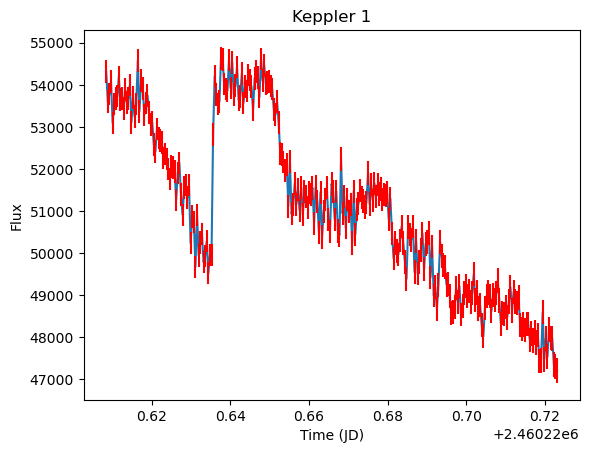

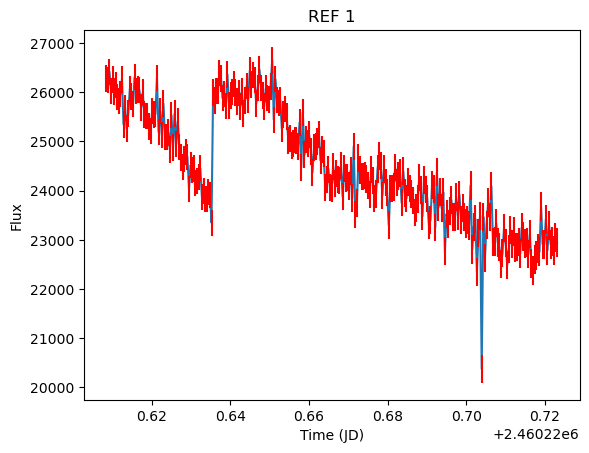

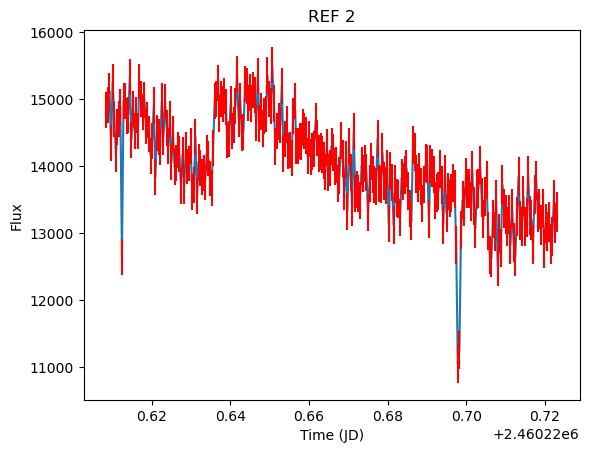

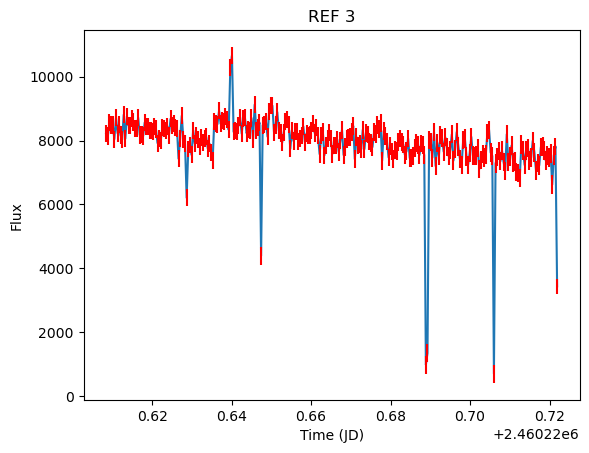

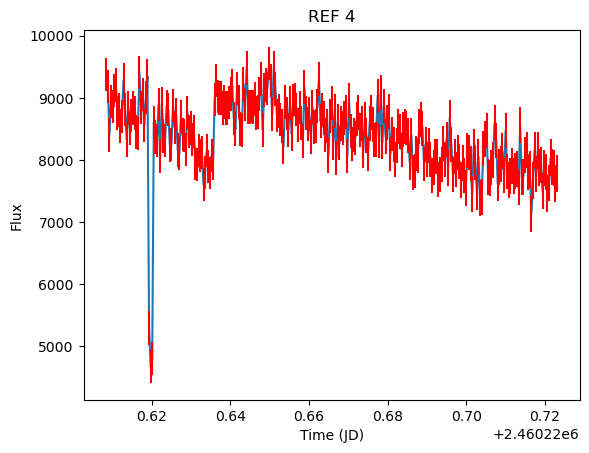

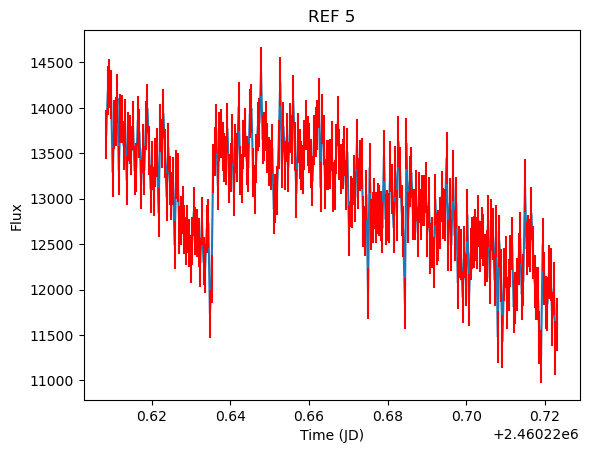

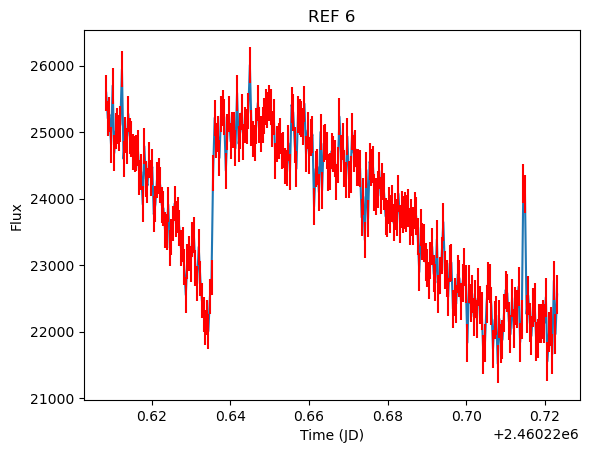

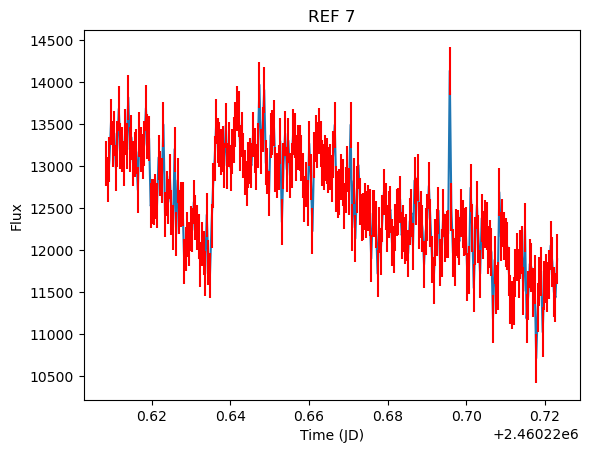

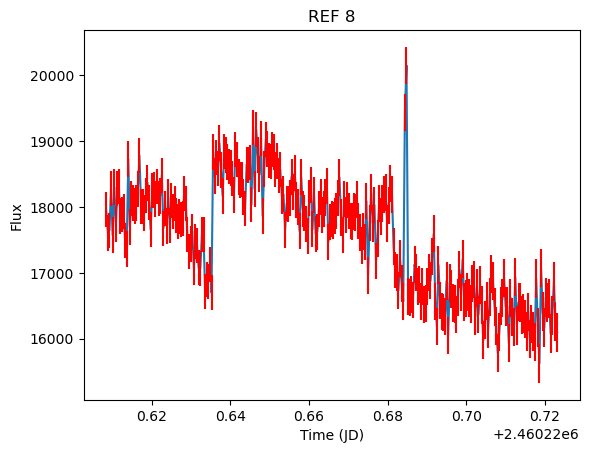

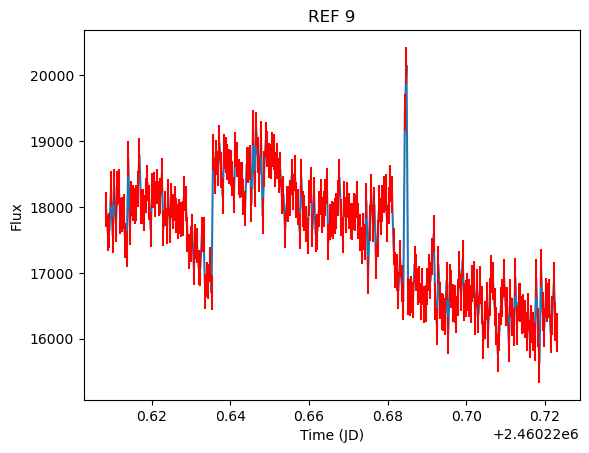

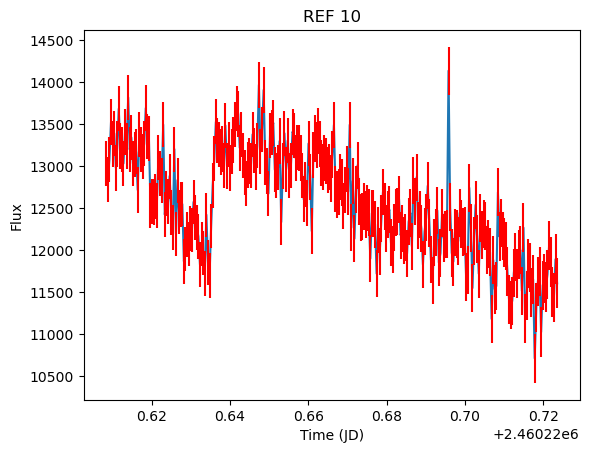

In [68]:
for i in range(0, 11):
#     plt.figure(figsize=(20, 10))
    plt.xlabel('Time (JD)')
    plt.plot(JDs[i], flux[i])
    plt.errorbar(JDs[i], flux[i], linestyle='', c='r', yerr=flux_err[i])
    plt.ylabel('Flux')
    if i == 0:
        plt.title("Keppler 1")
    else:
        plt.title(rf'REF {i}')
    plt.show()

In [69]:
# Here we want to line up our data so that when we calculate the weighted means we're not
# mixing our points together

ind_targ = ind_1 = ind_2 = ind_2 = ind_3 = ind_4 = ind_5 = ind_6 = ind_7 = ind_8 = ind_9 = ind_10 = 0
ind = [ind_targ, ind_1, ind_2, ind_3, ind_4, ind_5, ind_6, ind_7, ind_8, ind_9, ind_10]

weighted_means = []
weighted_errs = []

while np.max(ind) < len(JDs[0]):
    temp_flux = []
    temp_flux_err = []
    temp_flux = np.array(temp_flux)
    temp_flux_err = np.array(temp_flux_err)
    date = JDs[0][ind[0]]

    for i in range(1, 11):
        if ind[i] >= len(JDs[i]):
            break
        if JDs[i][ind[i]] == date:
            temp_flux = np.append(temp_flux, flux[i][ind[i]])
            temp_flux_err = np.append(temp_flux_err, flux_err[i][ind[i]])
            ind[i] += 1

    ind[0] += 1
    
    if len(temp_flux_err) != 0:
        w_mean = sum(temp_flux / (temp_flux_err**2)) / sum(1. / temp_flux_err**2)
        w_err = np.sqrt(sum(1. / temp_flux_err**2))
    else:
        w_mean = 1.0
        w_err = 1.0
    weighted_means.append(w_mean)
    weighted_errs.append(w_err)
#     print(f"Weighted mean is {w_mean}")

In [70]:
for i in range(0, 11):
    print(JDs[i][-1])

r_s = []
r_s_err = []
for i in range(0, len(flux[0])):
    r_s.append(flux[0][i] / weighted_means[i])
    r_s_err.append(np.abs(flux[0][i] / weighted_means[i]) * 
                   np.sqrt((flux_err[0][i]/flux[0][i])**2 + (weighted_errs[i]/weighted_means[i])*2))

2460220.7231345833
2460220.7231345833
2460220.7231345833
2460220.7219071295
2460220.7231345833
2460220.7231345833
2460220.7231345833
2460220.7231345833
2460220.7231345833
2460220.7231345833
2460220.7235420253


In [71]:
pre_transit = 15

pre_flux = r_s[:pre_transit]
median_flux = np.median(pre_flux)
flux_norm = r_s / median_flux
flux_norm_err = r_s_err / median_flux

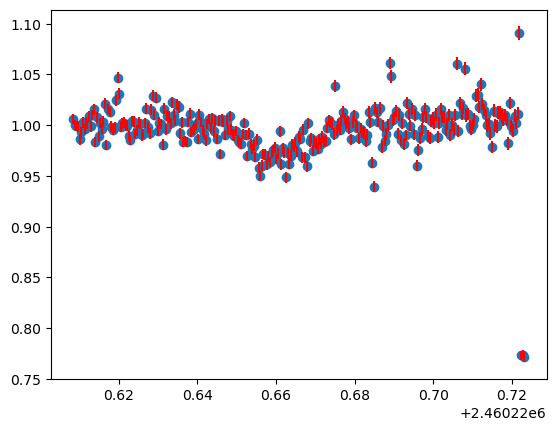

In [72]:
plt.plot(JDs[0], flux_norm,'o')
plt.errorbar(JDs[0], flux_norm, linestyle='', c='r', yerr=flux_norm_err)
plt.show()

tol = 0.1
flux_norm_1 = flux_norm[:].tolist()
flux_norm_1_err = flux_norm_err[:].tolist()
JDs_1 = JDs[0][:]
i = 0
while i < len(flux_norm_1):
    if flux_norm_1[i] > 1.0 + tol or flux_norm_1[i] < 1.0 - tol:
        flux_norm_1.pop(i)
        flux_norm_1_err.pop(i)
        JDs_1.pop(i)
        i -= 1
    i += 1

# for a,b in zip(flux_norm, flux_norm_err):
#     print('{:<20}{:<20}'.format(a,b))

In [73]:
import csv

ind_targ = ind_1 = ind_2 = ind_2 = ind_3 = ind_4 = ind_5 = ind_6 = ind_7 = ind_8 = ind_9 = ind_10 = 0
ind = [ind_targ, ind_1, ind_2, ind_3, ind_4, ind_5, ind_6, ind_7, ind_8, ind_9, ind_10]

headers = ['DATE-OBS', 'Target Flux', 'Target Flux Error', 'Rescaled Ref Fluxes', 'r', 'r error', 'XO Norm', 'XO Norm error']
data = zip(JDs[0], flux[0], flux_err[0], weighted_means, r_s, r_s_err, flux_norm, flux_norm_err)

with open('section_4_5.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(headers)
    for row in data: 
    #     stacked_data = np.column_stack((JDs[0], flux[0], flux_err[0], weighted_means, r_s, r_s_err))
        writer.writerow(row)